# Notebook for debugging

***

In [1]:
%run -i imports.py
%matplotlib inline

Python==3.10.13

numpy==1.26.3
pandas==2.2.0


In [2]:
from pykitPIV import Particle, FlowField, Image, Motion

In [3]:
n_images = 1

In [4]:
image_size = (128,512)

In [5]:
size_buffer = 20

***

## Generate particles

In [6]:
particles = Particle(n_images, 
                     size=image_size, 
                     size_buffer=size_buffer,
                     diameters=(2,6),
                     distances=(1,2),
                     densities=(0.05,0.1),
                     signal_to_noise=(5,20),
                     diameter_std=0.1,
                     seeding_mode='random', 
                     random_seed=100)

In [7]:
image = Image(random_seed=100)

In [8]:
image.add_particles(particles)

Particles added to the image.


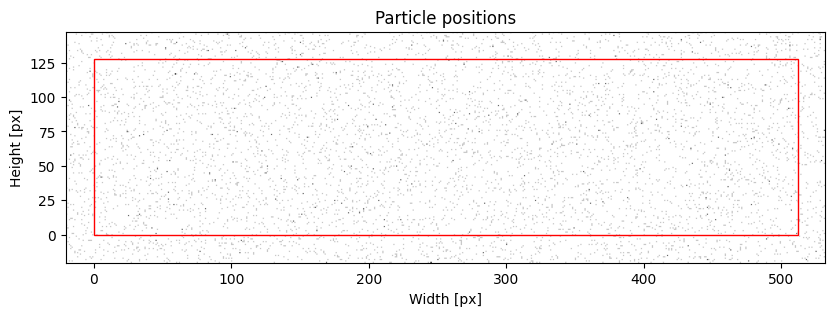

In [9]:
image.plot(0, 
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Particle positions',
           cmap='Greys',
           figsize=(20,3), 
           filename='particle-positions.png');

In [10]:
np.max(particles.particle_coordinates[0][1])

551.98777055539

In [11]:
image.add_reflected_light(exposures=(0.01,0.8),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.85,
                          alpha=1/10)

Reflected light added to the image.


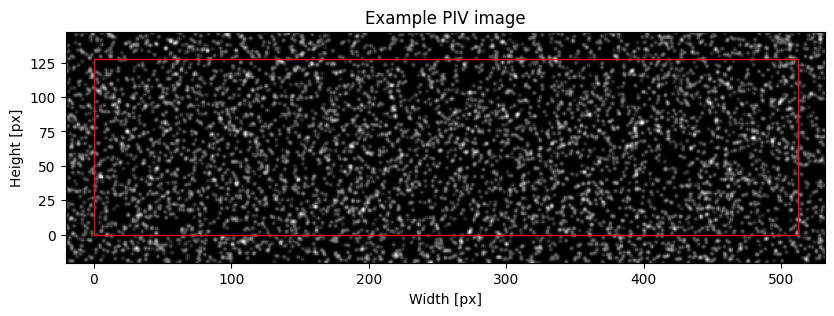

In [12]:
image.plot(0, 
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image',
           cmap='Greys_r',
           figsize=(10,3), 
           filename='example-image.png');

In [13]:
# plt.scatter(particles.particle_coordinates[0][1], particles.particle_coordinates[0][0], c='k', s=10, zorder=10)
# plt.xticks([i for i in range(0,particles.size_with_buffer[1]+1)])
# plt.yticks([i for i in range(0,particles.size_with_buffer[0]+1)])
# plt.grid(zorder=1)

***

## Generate random velocity field to advect the particles

In [14]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer,
                      flow_mode='random',
                      gaussian_filters=(8,10),
                      n_gaussian_filter_iter=10,
                      sin_period=(30,300),
                      displacement=(0,10),
                      random_seed=100)

In [15]:
image.add_velocity_field(flowfield)

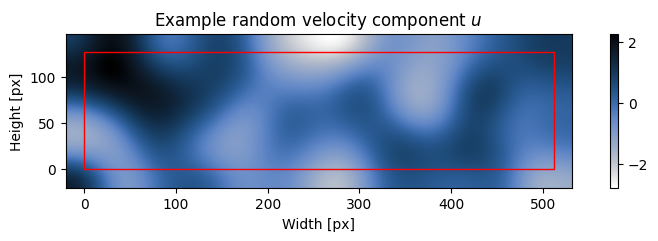

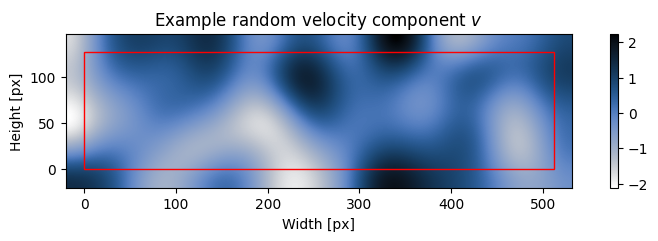

In [16]:
image.plot_velocity_field(0,
                          with_buffer=True,
                          xlabel='Width [px]',
                          ylabel='Height [px]',
                          title=('Example random velocity component $u$', 'Example random velocity component $v$'),
                          cmap=cmc.oslo_r,
                          # vmin_vmax=(-3,3),
                          figsize=(10,2),
                          filename='example-random-velocity-field.png');

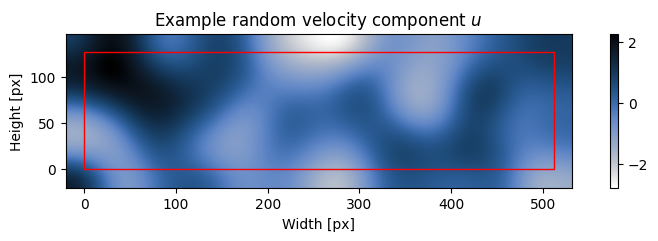

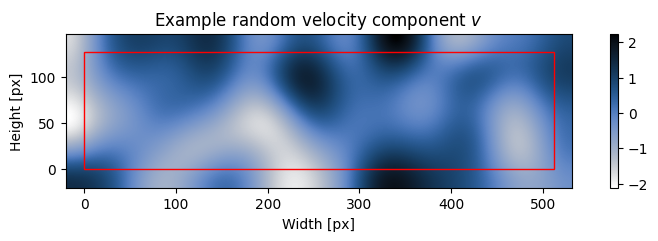

In [17]:
image.plot_velocity_field(0,
                          with_buffer=True,
                          xlabel='Width [px]',
                          ylabel='Height [px]',
                          title=('Example random velocity component $u$', 'Example random velocity component $v$'),
                          cmap=cmc.oslo_r,
                          # vmin_vmax=(-3,3),
                          figsize=(10,2),
                          filename='example-random-velocity-field.png');

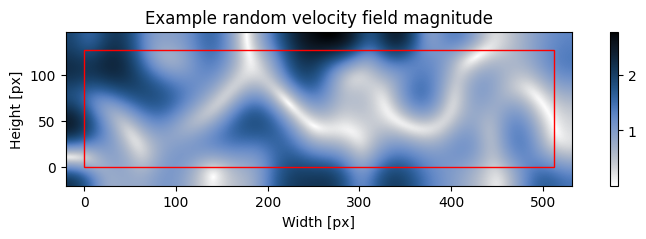

In [18]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=True,
                                    xlabel='Width [px]',
                                    ylabel='Height [px]',
                                    title='Example random velocity field magnitude',
                                    cmap=cmc.oslo_r,
                                    figsize=(10,2),
                                    filename='example-random-velocity-field-magnitude.png');

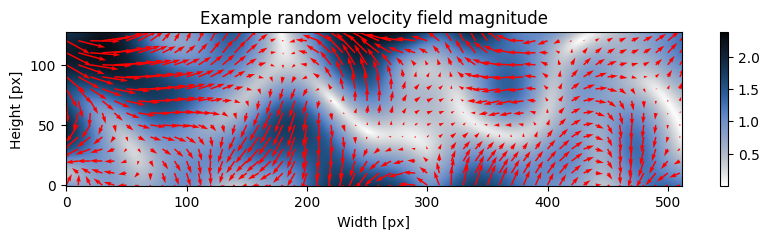

In [19]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=False,
                                    add_quiver=True,
                                    quiver_step=10,
                                    quiver_color='r',
                                    # add_streamplot=True,
                                    # streamplot_density=1,
                                    # streamplot_color='g',
                                    xlabel='Width [px]',
                                    ylabel='Height [px]',
                                    title='Example random velocity field magnitude',
                                    cmap=cmc.oslo_r,
                                    figsize=(10,2),
                                    filename='example-random-velocity-field-magnitude.png');

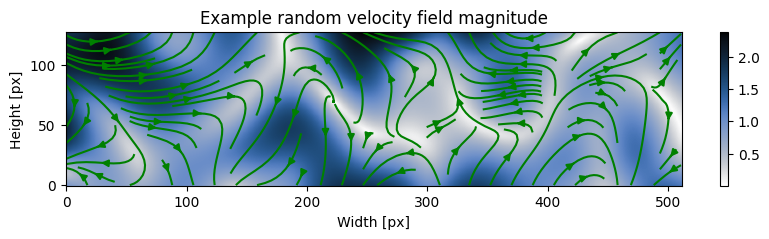

In [20]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=False,
                                    # add_quiver=True,
                                    # quiver_step=10,
                                    # quiver_color='r',
                                    add_streamplot=True,
                                    streamplot_density=1,
                                    streamplot_color='g',
                                    xlabel='Width [px]',
                                    ylabel='Height [px]',
                                    title='Example random velocity field magnitude',
                                    cmap=cmc.oslo_r,
                                    figsize=(10,2),
                                    filename='example-random-velocity-field-magnitude.png');

***

## Add movement to particles

In [43]:
motion = Motion(particles, 
                flowfield, 
                time_separation=0.2, 
                n_steps=10)

In [44]:
motion.forward_euler()

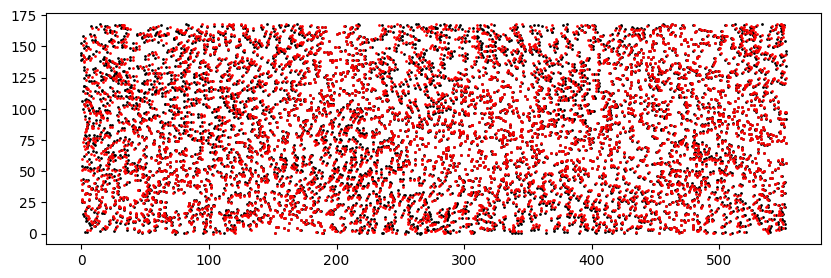

In [45]:
fig = plt.figure(figsize=(10,3))

plt.scatter(motion.particle_coordinates_I1[0][1], motion.particle_coordinates_I1[0][0], c='k', s=1)
plt.scatter(motion.particle_coordinates_I2[0][1], motion.particle_coordinates_I2[0][0], c='r', s=1)

***